<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/TKMT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng thư viện pandas để quản lý và phân tích dữ liệu

In [64]:
import pandas as pd

Đọc tập dữ liệu state.csv

In [65]:
df = pd.read_csv('state.csv')

Hiển thị các thông số cơ bản của tập dữ liệu

In [66]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [67]:
df.shape

(50, 4)

Ghi chú: Nếu có cột dữ liệu ID/STT thì loại bỏ cột này vì không có ý nghĩa khi phân tích dữ liệu

PHÂN TÍCH DỮ LIỆU ĐỊNH LƯỢNG

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác (Khi thành thạo có thể không cần thực hiện thao tác sao chép này)

In [68]:
df_dl = pd.DataFrame(columns = ['Population', 'Murder.Rate'], data = df)
df_dl.head()

,Population,Murder.Rate
0,4779736,5.7
1,710231,5.6
2,6392017,4.7
3,2915918,5.6
4,37253956,4.4


In [69]:
df_dl.shape

(50, 2)

Tính các thông số thống kê định lượng

In [70]:
print('Giá trị trung bình: ', df_dl['Population'].mean(), "; ", df_dl['Murder.Rate'].mean())

Giá trị trung bình:  6162876.3 ;  4.066


In [71]:
print('Giá trị lớn nhất: ', df_dl['Population'].max(), "; ", df_dl['Murder.Rate'].max())

Giá trị lớn nhất:  37253956 ;  10.3


In [72]:
print('Giá trị nhỏ nhất: ', df_dl['Population'].min(), "; ", df_dl['Murder.Rate'].min())

Giá trị nhỏ nhất:  563626 ;  0.9


In [73]:
print('Độ lệch chuẩn: ', df_dl['Population'].std(), "; ", df_dl['Murder.Rate'].std())

Độ lệch chuẩn:  6848235.347401142 ;  1.915736124302923


In [74]:
print('Phương sai: ', df_dl['Population'].var(), "; ", df_dl['Murder.Rate'].var())

Phương sai:  46898327373394.445 ;  3.670044897959184


In [75]:
print('Q1 của  Population', df_dl['Population'].quantile(0.25), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.25))

Q1 của  Population 1833004.25 ; của Murder.Rate 2.425


In [76]:
print('Q2 của  Population', df_dl['Population'].quantile(0.50), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.50))

Q2 của  Population 4436369.5 ; của Murder.Rate 4.0


In [77]:
print('Q3 của  Population', df_dl['Population'].quantile(0.75), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.75))

Q3 của  Population 6680312.25 ; của Murder.Rate 5.55


In [78]:
print('IQR ',df_dl['Population'].quantile(0.75) - df_dl['Population'].quantile(0.25), "; ", df_dl['Murder.Rate'].quantile(0.75) - df_dl['Murder.Rate'].quantile(0.25) )

IQR  4847308.0 ;  3.125


Có thể thay các phép tính riêng biệt trên bằng cách sử dụng hàm describe

In [79]:
df_dl.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Mô tả trực quan hóa dữ liệu định lượng

In [80]:
import matplotlib.pyplot as plt

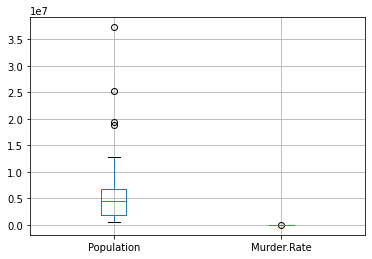

In [81]:
boxplot = df_dl.boxplot(column=['Population', 'Murder.Rate'])

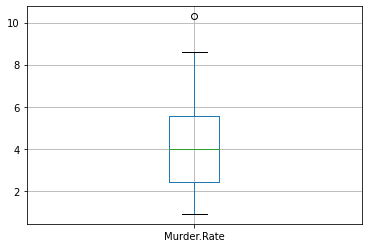

In [82]:
df_dl.boxplot(column=['Murder.Rate'])

Xem xét mối quan hệ giữa 2 biến định lượng có thể sử dụng công cụ trực quan scatterplot

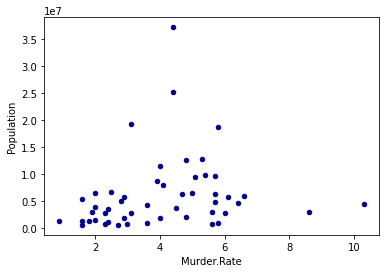

In [83]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')

Mối quan hệ giữa 2 cột dữ liệu định lượng còn được biểu hiện qua hệ số tương quan (correlation). Trong pandas có thể tính hệ số này như sau:

In [84]:
df_dl.corr(method='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

Câu trả lời:

##Corrlation (Tương quan): Mối liên hệ giữa hai biến.

Các đại lượng để đo lường mối quan liên hệ giữa hai biến:

**1 Hiệp phương sai (covariance):**

* Công thức tính hiệp phương sai mẫu:


\begin{align}
        s_{xy} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i - \overline{y})}{n-1}
    \end{align}

Với: 

($x_1$, $y_1$), ($x_2$, $y_2$), ..., ($x_n$, $y_n$) là các quan sát của một mẫu với kích thước n.

$\overline{x}$ là trung bình của $x_1$, $x_2$, ..., $x_n$

$\overline{y}$ là trung bình của $y_1$, $y_2$, ..., $y_n$

* Ý nghĩa của hiệp phương sai:

Ta tiến hành vẽ hai đường thằng x = $\overline{x}$ và y = $\overline{y}$ trong biểu đồ scatter, hai đường thẳng trên chia mặt phẳng tọa độ thành bốn góc phần tư:

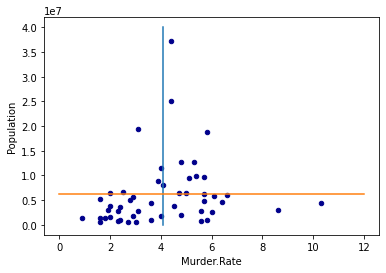

In [85]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')
plt.plot([df_dl['Murder.Rate'].mean() for i in range(2)],
         [0, 40 * (10 ** 6)]);
plt.plot([0, 12],
         [df_dl['Population'].mean() for i in range(2)]);


> Khi hiệp phương sai dương thì các điểm của đồ thị scatter đa số sẽ nằm trên góc phần tư thứ nhất và thứ ba và âm thì nằm trên góc phần tư thứ hai và thứ tư. Hay ta có thể nói nếu như hiệp phương sai dương thì hai biến sẽ có mối quan hệ thuận (x tăng thì y tăng) và âm thì có mối quan hệ nghịch (x tăng thì y giảm)

> Giá trị của hiệp phương sai càng lớn thì mối quan hệ tuyến tính càng mạnh. Tuy nhiên đơn vị là một vấn đề lớn bởi với một đơn vị ta lại có một kết quả hiệp phương sai khác nhau. Do đó ta cần một đại lượng khác để đo lường mối quan hệ mà không bị ảnh hưởng bởi đơn vị đo, đó là **Correlation coefficient (Hệ số tương quan)**



* Ví dụ: Ta xét  mối quan hệ giữa Murder.Rate và Population:

Ta viết hàm để tính hiệp phương sai:

In [86]:
def covariance(x, y):
    # Tính trung bình của x, y
    mean_x = x.mean()
    mean_y = y.mean()
    # Tập hợp các hiệu của phần từ x,y trừ đi trung bình của nó
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

Hiệp phương sai giữa Murder.Rate và Population:

In [87]:
covariance(df_dl['Murder.Rate'], df_dl['Population'])

2388642.6940816334

Hoặc ta có thể dùng hàm cov() của pandas như sau:

In [88]:
df_dl.cov()

,Population,Murder.Rate
Population,4.689833e+13,2.388643e+06
Murder.Rate,2.388643e+06,3.670045e+00


Vì hiệp phương sai dương nên Murder.Rate và Population có mối quan hệ thuận. 

Giá trị của hiệp phương sai tương đối lớn tuy nhiên mối quan hệ tuyến tính lại không rõ ràng khi ta nhìn vào biểu đồ scatter (Vì Murder.Rate đơn vị là phần trăm và Population đơn vị là người)

**2 Correlation coefficient (Hệ số tương quan)**

* Công thức tính hệ số tương quan Pearson: dữ liệu mẫu:




\begin{align}
        r_{xy} = \frac{s_{xy}}{s_x s_y}
    \end{align}


Với:

> $s_{xy}$ là hiệp phương sai của x,y

> $s_x$ là phương sai của x

> $s_y$ là phương sai của y

* Ý nghĩa: 

> Hệ số tương quan nằm trong khoảng từ -1 đến +1. Càng tiến gần đến -1 hoặc +1 thì mối quan hệ tuyến tính càng mạnh

> Hệ số tương quan dương thì hai biến có mối quan hệ thuận (x tăng thì y tăng)

> Hệ số tương quan âm thì hai biến có mối quan hệ nghịch (x tăng thì y giảm)

* Ví dụ: Ta tiếp tục xét mối quan hệ giữa Murder.Rate và Population:

Hệ số tương quan Pearson giữa Murder.Rate và Population:

In [89]:
df_dl.corr(method='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


Kết quả hiển thị ở trên được gọi là Correlation matrix (Ma trận tương quan) - một bảng thể hiện hệ số tương quan giữa các biến khi ta có nhiều hơn 2 biến trong bộ dữ liệu. Mỗi ô trong bảng thể hiện mối tương quan của hai biến.

Thông qua bảng ở trên ta xác định được hệ số tương quan Pearson của Murder.Rate và Population là 0.182069 lớn hơn 0 nhưng tương đối gần 0. Nên ta có thể kết luận có chúng mối tương quan giữa hai biến này rất yếu (tham khảo ảnh bên dưới). Từ đây ta thấy được kết luận của hiệp phương sai trước đó không được thỏa đáng do đơn vị đo không đồng bộ.

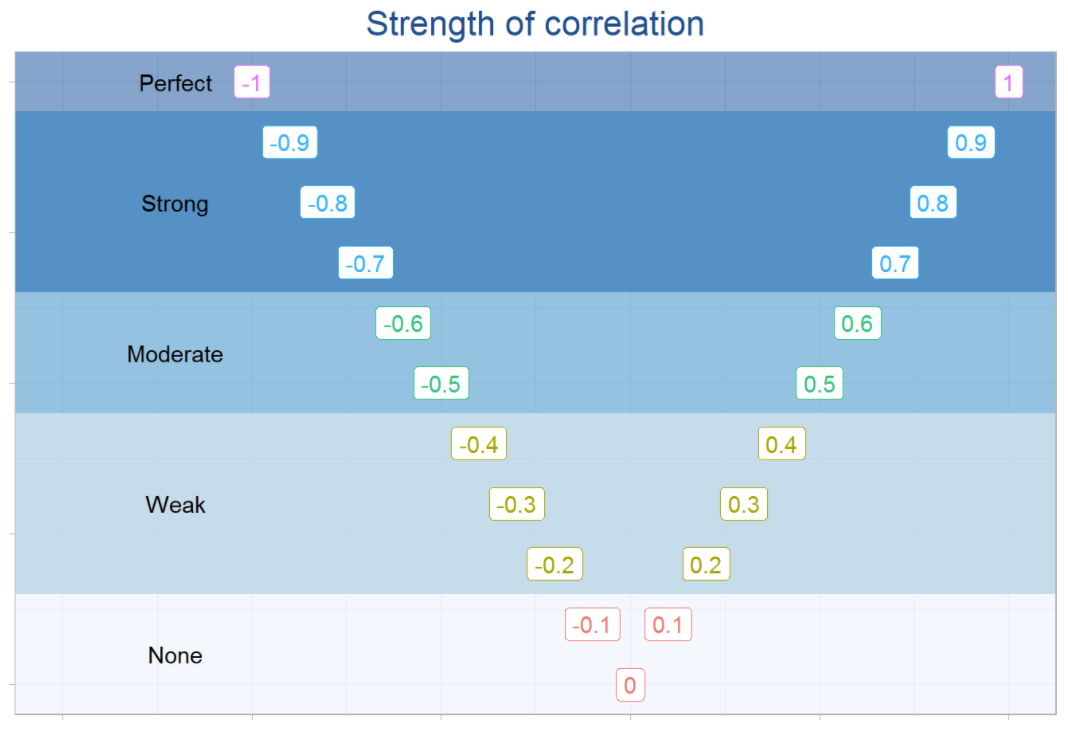

* Ví dụ 2: Ta xét hai biến mới mà có thể mối tương quan tuyến tính thuận của nó sẽ mạnh:

Thêm một cột Murder.Number vào df_dl:

In [90]:
df_dl["Murder.Number"] = df_dl["Murder.Rate"] * df_dl["Population"] / 100

Hiển thị một vài dòng đầu của tập dữ liệu:

In [91]:
df_dl.head()

,Population,Murder.Rate,Murder.Number
0,4779736,5.7,272444.952
1,710231,5.6,39772.936
2,6392017,4.7,300424.799
3,2915918,5.6,163291.408
4,37253956,4.4,1639174.064


Tính hệ số tương quan Pearson giữa các biến số:

In [92]:
df_dl.corr(method='pearson')

,Population,Murder.Rate,Murder.Number
Population,1.000000,0.182069,0.957203
Murder.Rate,0.182069,1.000000,0.401315
Murder.Number,0.957203,0.401315,1.000000


Hệ số tương quan Pearson giữa Murder.Number và Population xấp xỉ 0.96 lớn hơn 0 và gần bằng 1. Nên mối quan hệ giữa chúng là mối quan hệ tuyến tính mạnh

Bạn có thể quan sát hình vẽ bên dưới:

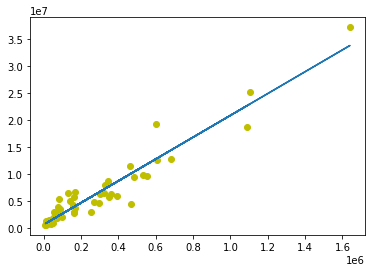

In [94]:
import numpy as np

# Tìm phương trình hồi quy:
coef = np.polyfit(df_dl["Murder.Number"],df_dl["Population"],1)
poly1d_fn = np.poly1d(coef) 
# Vẽ biểu đồ:
plt.plot(df_dl["Murder.Number"],df_dl["Population"], 'yo', 
         df_dl["Murder.Number"], poly1d_fn(df_dl["Murder.Number"]),);